In [1]:
import pandas as pd
import numpy as np
import string

In [3]:
df = pd.read_csv("c:/Users/hp/Desktop/topics_to_company_matching.csv")
df['question'] = df['question'].str.replace(r'[^\w\s]+', '')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
df.head()

,company,question,topic,subject,Department
0,3i Infotech,In a digital circuit which was to implement A ...,Combinational and sequential circuits,Digital Logic,CSE/IT
1,3i Infotech,78 In a digital circuit which was to implement...,Combinational and sequential circuits,Digital Logic,CSE/IT
2,3i Infotech,78 In a digital circuit which was to implement...,Combinational and sequential circuits,Digital Logic,CSE/IT
3,3i Infotech,77 In a digital circuit which was to implement...,Combinational and sequential circuits,Digital Logic,CSE/IT
4,3i Infotech,68 There was a circuit given using three nand ...,Combinational and sequential circuits,Digital Logic,CSE/IT


In [5]:
filtered = pd.read_csv("C:/Users/hp/Desktop/Filtered Questions - Using4words.csv",header =-1)
filtered.rename({0:'index',1:'question'},inplace=True,axis =1)
filtered['question'] = filtered['question'].str.replace(r'[^\w\s]+', '')
filtered['topic']=None
filtered.head()

,index,question,topic
0,0,In a digital circuit which was to implement A ...,None
1,1,In quants section questions are very easy to ...,None
2,2,When for a transmission line the open circuit ...,None
3,3,When a square wave is fed to an RC circuit then,None
4,4,When a transistor is required to match a 100W ...,None


In [6]:
x =0
while x <len(filtered):
    y=0
    while y<len(df):
        if filtered.question[x] == df.question[y]:
            filtered.topic[x]=df.topic[y]
            break
        y=y+1
    x=x+1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [134]:
filtered.head()

,index,question,topic
0,0,In a digital circuit which was to implement A ...,Combinational and sequential circuits
1,1,In quants section questions are very easy to ...,Combinational and sequential circuits
2,2,When for a transmission line the open circuit ...,Combinational and sequential circuits
3,3,When a square wave is fed to an RC circuit then,Combinational and sequential circuits
4,4,When a transistor is required to match a 100W ...,Combinational and sequential circuits


In [8]:
filtered.to_csv("c:/Users/hp/Desktop/matched_topics.csv")

In [9]:
filtered = pd.read_csv("c:/Users/hp/Desktop/matched_topics.csv")

In [15]:
filtered.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
topic_question ={}

In [80]:
l =filtered.topic.unique()
len(l)

63

In [40]:
topic_and_no_of_questions ={}
for x in l:
    topic_and_no_of_questions.update({x:len(filtered[filtered.topic == x])})

In [58]:
nofques = pd.DataFrame(index=topic_and_no_of_questions.keys(),data=topic_and_no_of_questions.values(),columns=["Count",])

In [66]:
nofques.sort_index(inplace=True)

In [96]:
nofques.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Algorithm design techniques to trees
Data columns (total 1 columns):
Count    63 non-null int64
dtypes: int64(1)
memory usage: 1008.0+ bytes


In [99]:
nofques.describe()

,Count
count,63.000000
mean,38.444444
std,63.044986
min,1.000000
25%,6.000000
50%,14.000000
75%,44.500000
max,364.000000


In [103]:
len(nofques[nofques.Count < 10])   

28

In [109]:
print nofques[nofques.Count<10].sort_index()

                                                    Count
CPU scheduling                                          2
Ethernet                                                8
File  organization                                      3
HTTP                                                    1
IPv6                                                    1
Integrity constraints                                   3
LAN  technologies                                       8
Network  security                                       7
Recursion                                               9
Runtime environments                                    8
Transactions  and concurrency control                   1
Turing machines and undecidability                      2
UDP and sockets                                         2
authentication                                          2
basics  of  public  key  and  private  key cryp...      7
binary heaps                                            7
cache         

In [112]:
print nofques[nofques.Count<5].sort_index()
len(nofques[nofques.Count<5])

                                       Count
CPU scheduling                             2
File  organization                         3
HTTP                                       1
IPv6                                       1
Integrity constraints                      3
Transactions  and concurrency control      1
Turing machines and undecidability         2
UDP and sockets                            2
authentication                             2
cache                                      3
congestion control                         4
indexing                                   2
pumping lemma                              1
routers and routing algorithms             4
switching                                  3


15

In [128]:
import operator
print max(topic_and_no_of_questions.iteritems(), key=operator.itemgetter(1))[0]
topic_and_no_of_questions[max(topic_and_no_of_questions.iteritems(), key=operator.itemgetter(1))[0]]

pumping lemma


1

In [130]:
len(filtered.question.unique())

1215

In [131]:
len(filtered)

2422

In [155]:
filtered.drop_duplicates(subset="question",inplace =True)

In [156]:
topic_and_no_of_questions2 ={}
for x in l:
    topic_and_no_of_questions2.update({x:len(filtered[filtered.topic == x])})

In [157]:
nofques2 = pd.DataFrame(index=topic_and_no_of_questions2.keys(),data=topic_and_no_of_questions2.values(),columns=["Count",])

In [158]:
nofques2.sort_index(inplace=True)

In [159]:
nofques2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Algorithm design techniques to trees
Data columns (total 1 columns):
Count    63 non-null int64
dtypes: int64(1)
memory usage: 1008.0+ bytes


In [161]:
nofques2.describe()

,Count
count,63.000000
mean,19.285714
std,28.477172
min,1.000000
25%,3.000000
50%,8.000000
75%,23.000000
max,165.000000


In [163]:
len(nofques2[nofques2.Count < 10])   

33

In [165]:
len(nofques2[nofques2.Count < 5])   

18

In [167]:
print max(topic_and_no_of_questions2.iteritems(), key=operator.itemgetter(1))[0]
topic_and_no_of_questions2[max(topic_and_no_of_questions2.iteritems(), key=operator.itemgetter(1))[0]]

Asymptotic  worst  case  time  and  space  complexity


165

In [70]:
import matplotlib.pyplot as plt

(array([43.,  9.,  6.,  2.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([  1. ,  17.4,  33.8,  50.2,  66.6,  83. ,  99.4, 115.8, 132.2,
        148.6, 165. ]),
 <a list of 10 Patch objects>)

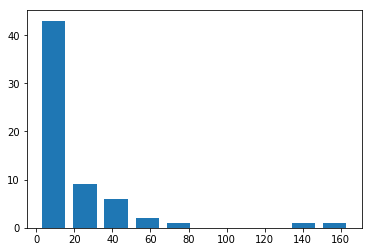

In [168]:
plt.hist(nofques2['Count'],rwidth=0.75,)

In [91]:
test=filtered.copy()

In [94]:
x = 0
while x<len(test):
    test['question'][x] = test['question'][x].split(' ')
    x = x+1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
test.head()

,index,question,topic
0,0,In a digital circuit which was to implement A ...,Combinational and sequential circuits
1,1,In quants section questions are very easy to ...,Combinational and sequential circuits
2,2,When for a transmission line the open circuit ...,Combinational and sequential circuits
3,3,When a square wave is fed to an RC circuit then,Combinational and sequential circuits
4,4,When a transistor is required to match a 100W ...,Combinational and sequential circuits


In [49]:
x = 0
tpc_dict ={}
while x < len(df):
    if df.topic[x] not in tpc_dict.keys():
        tpc_dict.update({df.topic[x]:[]})
    tpc_dict[df.topic[x]].append(df.subject[x])
    tpc_dict[df.topic[x]]=list(set(tpc_dict[df.topic[x]]))
    x = x+1
for x,y in tpc_dict.items():
    tpc_dict[x] = ','.join(y)

In [164]:
'tpc_dict'

'tpc_dict'

In [51]:
x = 0
sub_dict ={}
while x < len(df):
    if df.subject[x] not in sub_dict.keys():
        sub_dict.update({df.subject[x]:[]})
    sub_dict[df.subject[x]].append(df.Department[x])
    sub_dict[df.subject[x]]=list(set(sub_dict[df.subject[x]]))
    x = x+1
for x,y in sub_dict.items():
    sub_dict[x] = ','.join(y)

In [165]:
'sub_dict'

'sub_dict'

In [150]:
sub_to_dept = pd.DataFrame.from_dict(sub_dict,orient='index').reset_index()

In [151]:
sub_to_dept.rename({'index':'Sub',0:'Dept'},axis=1,inplace= True)

In [152]:
sub_to_dept

,Sub,Dept
0,Digital Logic,CSE/IT
1,Algorithms,CSE/IT
2,Programming and Data Structures,CSE/IT
3,Operating System,CSE/IT
4,Computer Organization and Architecture,CSE/IT
5,Compiler Design,CSE/IT
6,Computer Networks,CSE/IT
7,Databases,CSE/IT
8,Theory of Computation,CSE/IT


In [153]:
top_to_sub = pd.DataFrame.from_dict(tpc_dict,orient='index').reset_index()

In [154]:
top_to_sub.rename({'index':'Topic',0:'Subject'},axis=1,inplace= True)

In [156]:
top_to_sub.head()

,Topic,Subject
0,shortest paths,Algorithms
1,pumping lemma,Theory of Computation
2,routers and routing algorithms,Computer Networks
3,binary search trees,Programming and Data Structures
4,Recursion,Programming and Data Structures


In [157]:
top_to_sub['Dept'] = None

In [143]:
#need to work on it
x = 0
while x<len(top_to_sub):
    top_to_sub['Dept'][x] = sub_to_dept.loc[sub_to_dept['Sub']==top_to_sub.Subject[x]]['Dept']
    x = x+1
    

In [158]:
top_to_sub

,Topic,Subject,Dept
0,shortest paths,Algorithms,None
1,pumping lemma,Theory of Computation,None
2,routers and routing algorithms,Computer Networks,None
3,binary search trees,Programming and Data Structures,None
4,Recursion,Programming and Data Structures,None
5,data?path and control unit,Computer Organization and Architecture,None
6,Application layer protocols,Computer Networks,None
7,parsing,Compiler Design,None
8,Regular and contex-free languages,Theory of Computation,None
9,IPv4,Computer Networks,None
